In [50]:
# importing pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import csv
import os
import numpy as np

In [51]:
# path to the client-hello-cipher-suites.csv file
# file_path = '../../../results/attributes/DNS/NEW_dns_transID_response_attributes.csv'
file_path = '../../../results/attributes/DNS/NEW_dns_transID_request_attributes.csv'

# path to the directory to save the plots
final_output_dir = '../../../results/attributes/DNS/transID_plots'

In [52]:
df = pd.read_csv(file_path, sep='|')
df.tail()

Device                                            TransID
5         TribySpeaker  __64bd__02e6__5fed__5366__b5be__e074__a153__9c...
6           AmazonEcho  __234c__7abd__e3a0__e93f__3a5f__1f42__4869__2e...
7  WithingsSleepSensor  __7fcf__afc1__a14d__8d6b__52a5__c333__e84e__b8...
8        SamsungCamera  __fea8__c8c7__b9fc__6c11__231e__6a36__f2f7__f1...
9  WithingsBabyMonitor  __d1af__a1a9__faa4__69a8__7592__eb46__7efb__c9...

In [53]:
import csv
csv.field_size_limit(10 * 1024 * 1024)

# Read the CSV file and extract data
device_transID = {}
with open(file_path, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for i, row in enumerate(csvreader):
        # print(row)
        if i == 0:
            continue
        device = row[0].split('|')[0]
        # print(f'device: {device}')
        transIDs = row[0].split('|')[1].split('__')[1:]

        device_transID[device] = transIDs
        # print(f'devicess: {devices}')
            
        #     print(row[0])
        #     qnumber_dicts = row
            # continue

device_transID['AwairAirQuality'] = ['0000']
device_transID['LiFXBulb'] = ['0000']

for k, v in device_transID.items():
    print(f'key: {k}, value: {v}')

# # Create a dictionary to store qnumbers for each device
# device_qnumbers = {}
# for i, device_list in enumerate(devices):
#     for j, device in enumerate(device_list):
#         qnumber_dict = qnumber_dicts[i][j]
#         transaction_id = qnumber_dict['transaction id']
#         qnumbers = list(qnumber_dict.keys())
#         qnumbers.remove('transaction id')
        
#         if device not in device_qnumbers:
#             device_qnumbers[device] = []
#         device_qnumbers[device].extend(qnumbers)

# # Print the resulting dictionary
# for device, qnumbers in device_qnumbers.items():
#     print(f"Device: {device}, Qnumbers: {qnumbers}")


key: AwairAirQuality, value: ['0000']
key: LiFXBulb, value: ['0000']
key: PixStarPhotoFrame, value: ['7314', '7ab5', '51c8', '05c4', 'd5d1', 'd8c2', 'ca49', '6532', 'cec5', 'eb45', '5743', '76b1', '523c', '4bc8', '22ec', '697a', '65a1', '860b', 'e302', 'd40a', '5f22', '084b', 'daa1', '64b1', 'be4e', 'd087', 'd29b', '6e4c', '8833', '2a1e', '1969', '8eda', 'ebfe', 'db98', 'e2f7', '9721', 'b18a', '22d6', '5940', '9d09', '6bc6', '757f', 'a941', '2039', '2cc8', '0e41', '2e59', '27b4', '48be', '1137', '3f3c', '001e', '8876', '0944', 'dc97', 'aeab', '7e91', '7585', '4ebf', 'a585', 'fc34', '32fe', '9a1f', 'd648', 'bfdf', '9032', 'a762', 'd5c4', '9fe0', '7109', '60f0', 'a0ef', '3734', '8f28', '630c', 'e2be', 'dd6f', '6e70', '6ea1', '4afc', 'e0b7', '9d25', 'e7af', '65f7', '6584', '45fb', '8f24', '716d', 'ca3d', '6bfb', '38f1', '893f', 'a4e3', '37a8', '0c08', '17f4', 'e809', 'c72c', '53ed', 'eb6f', '1efe', '4455', 'f72d', '0b2a', 'b7a9', '5732', '1271', '22db', '0cc4', '85d5', '9afa', '0f2d', '94

## Data Pre-Processing

In [54]:
def hex_to_decimal(hex_number):
    try:
        decimal_number = int(hex_number, 16)
        return decimal_number
    except ValueError:
        raise ValueError("Invalid hexadecimal number")

In [55]:
for device, transID_list in device_transID.items():
    print(f'device: {device}')
    newList = []
    for i, transID in enumerate(transID_list):
        if transID == 'None' or transID == 'nan': continue
        print(f'i: {i}, transID: {transID}')
        # for ci, c in enumerate(cs):
        dec_val = hex_to_decimal(transID)
        # print(f'hex_val: {dec_val}')
        # cs[ci] = hex_val
        # transID_list[i] = math.log2(dec_val)
        # transID_list[i] = dec_val
        print(type(dec_val))
        if dec_val == 0:
            new_val = dec_val
        else:
            new_val = math.log2(dec_val)
            
        # newList.append(new_val)  
        newList.append(dec_val)  
    
    device_transID[device] = sorted(newList)
    # device_transID[device] = newList

device: AwairAirQuality
i: 0, transID: 0000
<class 'int'>
device: LiFXBulb
i: 0, transID: 0000
<class 'int'>
device: PixStarPhotoFrame
i: 0, transID: 7314
<class 'int'>
i: 1, transID: 7ab5
<class 'int'>
i: 2, transID: 51c8
<class 'int'>
i: 3, transID: 05c4
<class 'int'>
i: 4, transID: d5d1
<class 'int'>
i: 5, transID: d8c2
<class 'int'>
i: 6, transID: ca49
<class 'int'>
i: 7, transID: 6532
<class 'int'>
i: 8, transID: cec5
<class 'int'>
i: 9, transID: eb45
<class 'int'>
i: 10, transID: 5743
<class 'int'>
i: 11, transID: 76b1
<class 'int'>
i: 12, transID: 523c
<class 'int'>
i: 13, transID: 4bc8
<class 'int'>
i: 14, transID: 22ec
<class 'int'>
i: 15, transID: 697a
<class 'int'>
i: 16, transID: 65a1
<class 'int'>
i: 17, transID: 860b
<class 'int'>
i: 18, transID: e302
<class 'int'>
i: 19, transID: d40a
<class 'int'>
i: 20, transID: 5f22
<class 'int'>
i: 21, transID: 084b
<class 'int'>
i: 22, transID: daa1
<class 'int'>
i: 23, transID: 64b1
<class 'int'>
i: 24, transID: be4e
<class 'int'>


In [56]:
for k, v in device_transID.items():
    print(f'key: {k}, value: {v}')

key: AwairAirQuality, value: [0]
key: LiFXBulb, value: [0]
key: PixStarPhotoFrame, value: [0, 16, 30, 63, 73, 120, 149, 161, 203, 231, 240, 242, 245, 250, 251, 253, 259, 264, 288, 291, 308, 320, 345, 349, 351, 352, 418, 435, 449, 469, 480, 483, 524, 530, 537, 553, 555, 571, 602, 611, 612, 620, 628, 637, 659, 669, 703, 706, 729, 744, 773, 804, 806, 818, 823, 875, 877, 880, 888, 928, 930, 938, 949, 966, 967, 993, 995, 996, 1015, 1019, 1038, 1062, 1070, 1083, 1113, 1116, 1134, 1143, 1145, 1152, 1173, 1218, 1238, 1248, 1250, 1273, 1276, 1280, 1294, 1295, 1327, 1335, 1346, 1364, 1383, 1402, 1405, 1427, 1430, 1438, 1454, 1455, 1461, 1464, 1476, 1505, 1513, 1516, 1545, 1553, 1586, 1588, 1603, 1610, 1615, 1623, 1632, 1669, 1672, 1688, 1700, 1724, 1733, 1756, 1762, 1775, 1788, 1794, 1796, 1807, 1844, 1849, 1856, 1864, 1872, 1879, 1886, 1907, 1908, 1947, 1959, 1965, 1993, 2008, 2020, 2021, 2022, 2054, 2066, 2089, 2118, 2119, 2123, 2134, 2163, 2166, 2174, 2180, 2188, 2201, 2202, 2244, 2255, 2277,

## Plotting

In [57]:
def plot_list_as_line_plt(lst2D, save_name):
    x_values = 0
    # for i, cs in enumerate(lst2D):
    # if len(cs) <= 1:
        # print(f'case')
        # continue
        # return
    x_values = list(range(len(lst2D)))  # Use list indices as x-axis
    x_values = [x + 1 for x in x_values]
    y_values = lst2D  # Use list items as y-axis
    
    # general config for plots with more than 1 graph
    # if i==0:
    #     linstl = '-'
    #     mkr = 'o'
    #     clr = 'b'
    # if i==1:
    #     linstl = ':'
    #     mkr = '*'
    #     clr = 'y'
        
    # # specific configs for required devices
    # if save_name == 'LiFXBulb':  # LiFXBulb
    #     linstl = '--'
    #     mkr = '^'
    #     clr = 'c'
    # elif save_name == 'TPLinkCamera':  # TPLinkCamera
    #     linstl = '-.'
    #     mkr = 'x'
    #     clr = 'r'

    linstl = '-'
    mkr = '.'
    clr = 'b'
    sss = 2
    
    if save_name == 'AwairAirQuality' or save_name == 'LiFXBulb':
        sss = 20

    # plt.plot(x_values, y_values, marker=mkr, linestyle=linstl, color=clr)
    plt.scatter(x_values, y_values, color=clr, marker=mkr, label='Data Points', s=sss)

    plt.xlabel('Index of the offered list')
    plt.ylabel('Decimal equivalent of the hex code')
    # plt.title('Line Plot from List')
    plt.grid(True)

    x_values = np.array(x_values)
    even_xticks = x_values[x_values % 50 == 0]  # to get the x-axis grid lines
    # plt.xticks(even_xticks)
    
    # if len(x_values) <= 25:
    #     plt.xticks(range(len(x_values)), [int(x) for x in x_values])
    # elif len(x_values) <= 50:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 2 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)
    # elif len(x_values) <= 75:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 3 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)
    # elif len(x_values) <= 100:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 5 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)

    plt.savefig(os.path.join(final_output_dir, save_name), format='pdf')  # save
    plt.show()

# def plot_list_as_line_sns(lst2D, save_name):
#     x_values = list(range(len(lst)))  # Use list indices as x-axis
#     y_values = lst  # Use list items as y-axis

#     sns.lineplot(x=x_values, y=y_values, marker='o', color='b')
#     plt.xlabel('Index')
#     plt.ylabel('Value')
#     plt.title('Line Plot from List')
#     plt.grid(True)

#     plt.savefig(os.path.join(final_output_dir, save_name), format='pdf')  # save
#     plt.show()


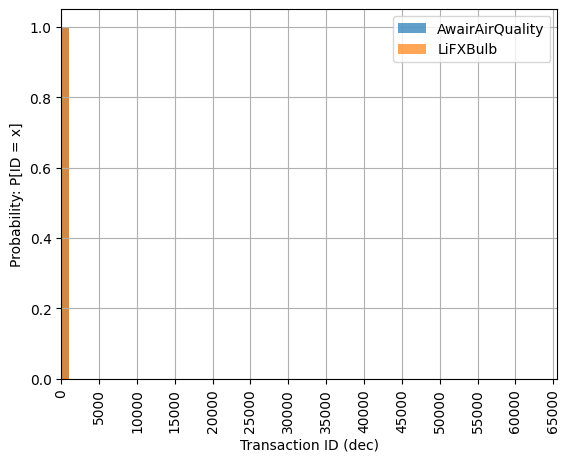

In [81]:
import time
device_g02 = ['TPLinkCamera', 'WithingsSleepSensor', 'WithingsBabyMonitor']
device_g03 = ['PixStarPhotoFrame', 'RingDoorBell', 'TribySpeaker', 'AmazonEcho', 'SamsungCamera']
device_g01 = ['AwairAirQuality', 'LiFXBulb']

binss0 = range(0, 150000, 1000)
binss1 = range(0, 65536, 1000)
binss2 = range(0, 20000, 500)
binss3 = range(0, 1000, 100)
binss4 = range(0, 100, 1)
# binss4 = range(0, 1, .01)


# x_values = range(0, 18000)

for device, css in device_transID.items():
    x_values = range(1, len(css)+1) # Use list indices as x-axis

    if device not in device_g01:
        continue
    # print(f'css: {css}')
    # print(f'min: {min(css)}, max: {max(css)}')
    device_name = device
    # if '/' in device:
    #     device_name = device.split('/')[0]

    # if device_name in printed_devices:
    #     continue  
    # print(f'device_name: {device_name}')

    clean_data = css

    # plt.scatter(x_values, clean_data, label=device, marker='d', s=5)

    n, bins, _ = plt.hist(clean_data, bins=binss1, density=True, alpha=0.7)

    bin_widths = bins[1] - bins[0]

    # Calculate relative frequencies (probabilities) for each bin
    probabilities = n * bin_widths

    plt.bar(bins[:-1], probabilities, width=bin_widths, align='edge', alpha=0.7, label=device)

    # plt.xticks(range(0, 65536, 5000), rotation='vertical')

    # plt.xlabel('Transmit Timestamp (xmt) Intervals (s)')
    # plt.ylabel('Probability: P[xmt = x]')
    # # plt.title('Line Plot from List')
    # plt.grid(True)
    # plt.legend()

    # # plt.savefig(os.path.join(final_output_dir, 'delta_transmit_timestamp.pdf'), format='pdf')  # save
    # print(f'len(css): {len(css)}')
    # plt.show()


    # time.sleep(2)
plt.xticks(range(0, 65536, 5000), rotation='vertical')
plt.xlim(0, 65535)

# plt.yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

plt.xlabel('Transaction ID (dec)')
plt.ylabel('Probability: P[ID = x]')
# plt.title('Line Plot from List')
plt.grid(True)
plt.legend()

plt.savefig(os.path.join(final_output_dir, 'transID_class01.pdf'), format='pdf')  # save
plt.show()



device_name: AwairAirQuality


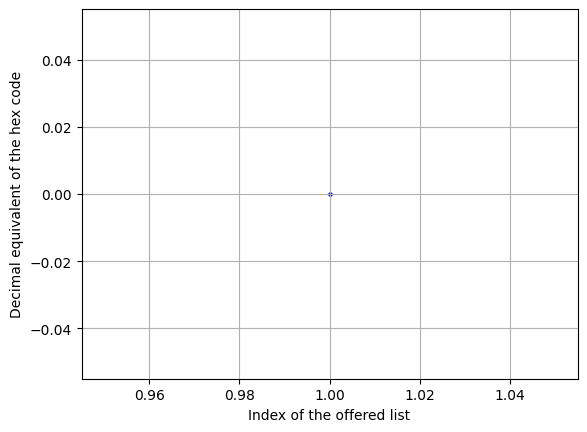

device_name: LiFXBulb


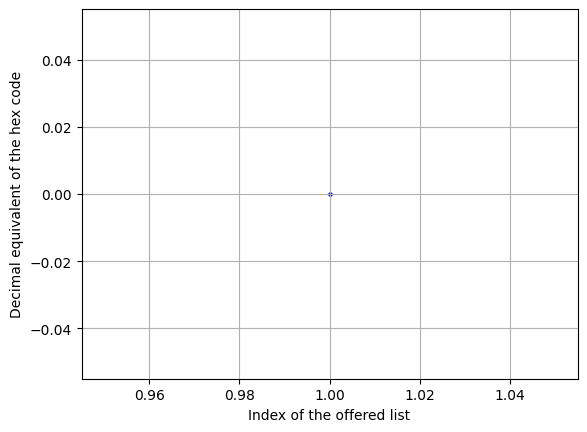

device_name: PixStarPhotoFrame


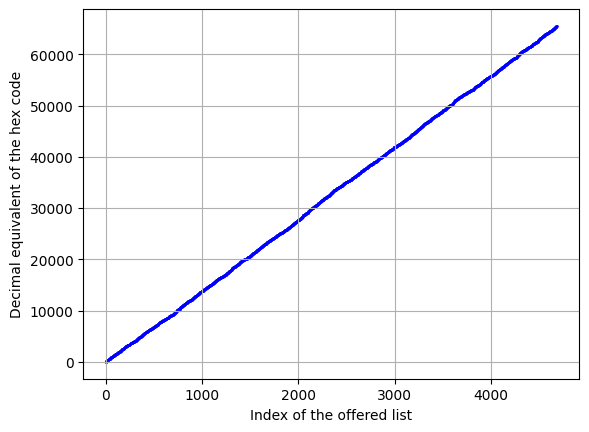

device_name: RingDoorBell


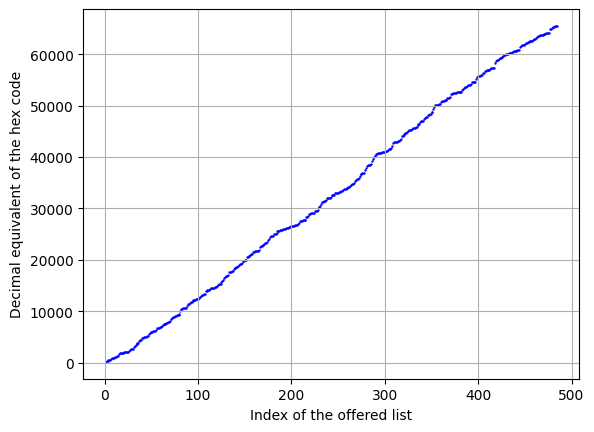

device_name: TPLinkCamera


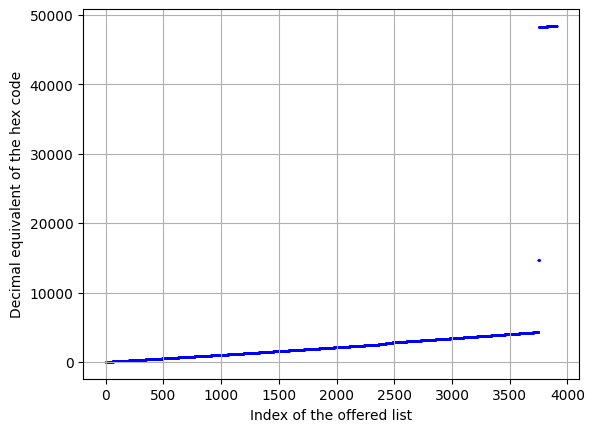

device_name: TribySpeaker


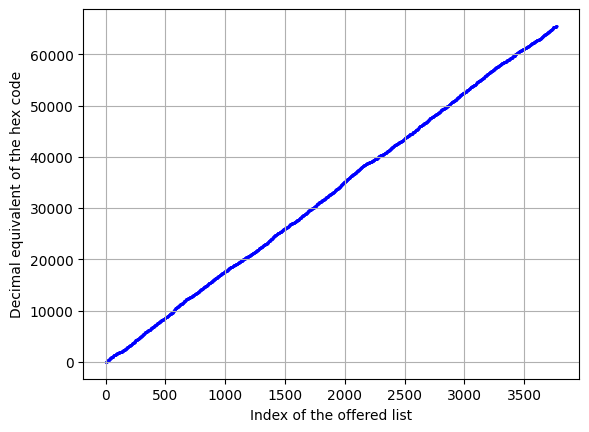

device_name: AmazonEcho


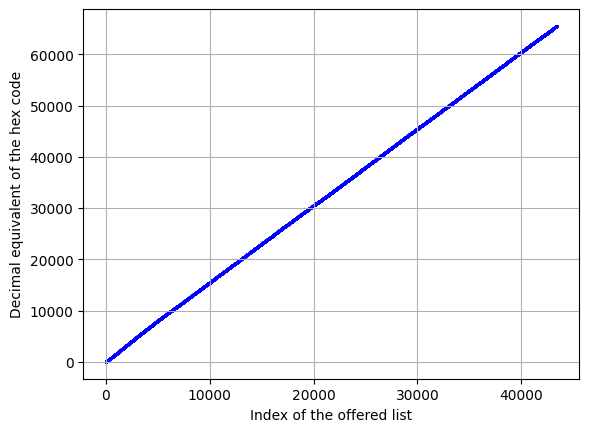

device_name: WithingsSleepSensor


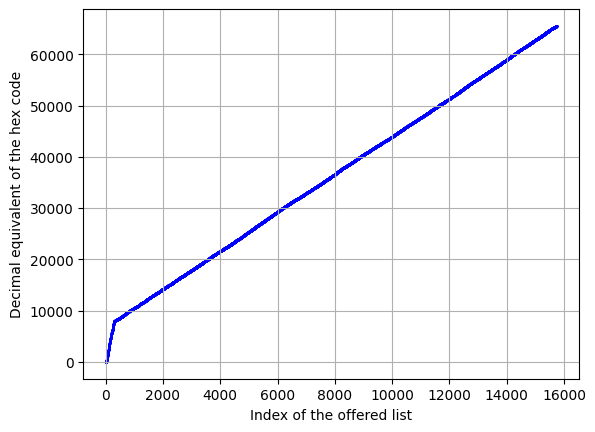

device_name: SamsungCamera


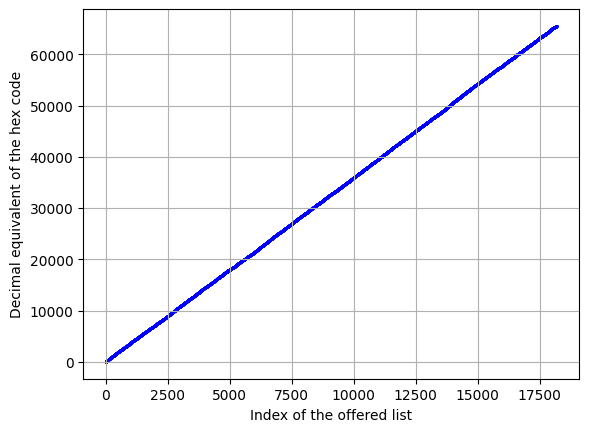

device_name: WithingsBabyMonitor


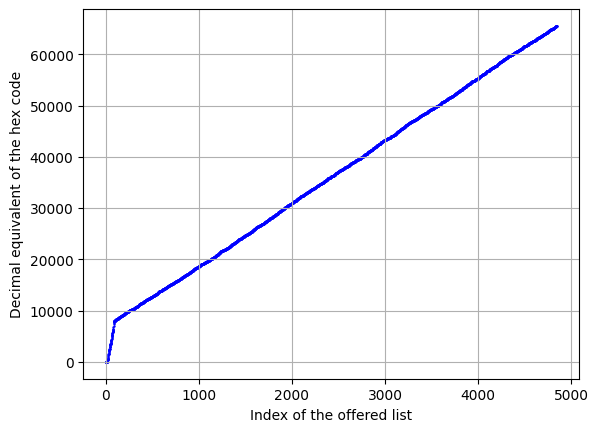

In [59]:
# plot_list_as_line_plt(dict01['AwairAirQuality'][0])
# plot_list_as_line_sns(dict01['AwairAirQuality'][0])
printed_devices = []
for device, css in device_transID.items():
    device_name = device
    # if '/' in device:
    #     device_name = device.split('/')[0]

    # if device_name in printed_devices:
    #     continue  
    print(f'device_name: {device_name}')
    plot_list_as_line_plt(css, device_name)
    printed_devices.append(device_name)
    # if len(css) < 1:
    #     print(f'device: {device} has 0 ciphersuites')
    #     continue
    # for csi, cs in enumerate(css):
    #     if len(cs) <= 1:
    #         print(f'device: {device}, cs: {csi} has 0 ciphers')
    #         continue
    #     if device_name in printed_devices:
    #         continue
    #     plot_list_as_line_plt(cs, device_name)
    #     printed_devices.append(device_name)